In [1]:
from __future__ import division
import pandas as pd
import re, pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords, PlaintextCorpusReader
#from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.10)

In [4]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.10)
#school_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_school.csv").sample(frac = 0.30)
project_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_project.csv").sample(frac = 0.10)
resource_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_resource.csv").sample(frac = 0.10)

In [5]:
teacher_survey_data_1 = teacher_survey_data[["teacher_hashed_id", "school_hashed_id", "q3_num_refugee_students", "q5b_refugee_academic_perf", "q6a_refugee_attendance", "q8b_refugee_services_only", "q9b_external_refugee_services_open_ended"]]
project_data_1 = project_data[["teacher_hashed_id", "school_hashed_id", "project_hashed_id", "project_essay_one", "project_essay_two", "project_impact_letter", "project_cost"]]
resource_data_1 = resource_data[["project_hashed_id", "resource_name", "resource_category", "resource_unit_price"]] 

In [6]:
teachers_with_refugee_students = teacher_survey_data_1.loc[teacher_survey_data["q3_num_refugee_students"] > 0]

In [7]:
projects_refugees = pd.merge(teachers_with_refugee_students, project_data_1, how="right", on=['teacher_hashed_id'])
projects_refugees_orig = pd.merge(projects_refugees, resource_data_1, how = "right", on=['project_hashed_id'])
projects_refugees_orig
# there are extra rows with NaN's in the first few columns because there are more projects than teacher_survey responses

,teacher_hashed_id,school_hashed_id_x,q3_num_refugee_students,q5b_refugee_academic_perf,q6a_refugee_attendance,q8b_refugee_services_only,q9b_external_refugee_services_open_ended,school_hashed_id_y,project_hashed_id,project_essay_one,project_essay_two,project_impact_letter,project_cost,resource_name,resource_category,resource_unit_price
0,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,b9396e6010f838088c57a2b21da191a8,our school was impacted by hurricane irma and ...,our school is receiving students from puerto r...,THANK YOU! THANK YOU! THANK YOU!!! The gift yo...,1720.92,ecr4kids 30 bay locking laptop tablet charging...,Computers & Tablets,563.04
1,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,b9396e6010f838088c57a2b21da191a8,our school was impacted by hurricane irma and ...,our school is receiving students from puerto r...,THANK YOU! THANK YOU! THANK YOU!!! The gift yo...,1720.92,florida test prep fsa practice test book mathe...,Books,17.99
2,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,d39fddf98aaba1bd95d632e493fb1a8f,every one of these students learns in a differ...,hurricane irma was a big shock to my students....,All of this PA equipment has made such a big ...,745.46,champion sports indoor outdoor horseshoe set,Sports & Exercise Equipment,19.97
3,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,d39fddf98aaba1bd95d632e493fb1a8f,every one of these students learns in a differ...,hurricane irma was a big shock to my students....,All of this PA equipment has made such a big ...,745.46,champion sports scooters with handles set of 6,Sports & Exercise Equipment,76.49
4,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,d39fddf98aaba1bd95d632e493fb1a8f,every one of these students learns in a differ...,hurricane irma was a big shock to my students....,All of this PA equipment has made such a big ...,745.46,spectrum gripper soccer balls 6 set,Sports & Exercise Equipment,30.42
5,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,ff3e0f29513c5f342645e90b0fd3843c,every one of these students learns in a differ...,these students live in an electronic age. the...,Let me just tell you THANK YOU SO MUCH for the...,335.40,red heart gumdrop yarn lemon,Art Supplies,7.85
6,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,ff3e0f29513c5f342645e90b0fd3843c,every one of these students learns in a differ...,these students live in an electronic age. the...,Let me just tell you THANK YOU SO MUCH for the...,335.40,red heart super saver jumbo yarn bright yellow,Art Supplies,9.94
7,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,05a60d2ad78f30be29b55d9cf2b21a71,ff3e0f29513c5f342645e90b0fd3843c,every one of these students learns in a differ...,these students live in an electronic age. the...,Let me just tell you THANK YOU SO MUCH for the...,335.40,red heart super saver jumbo yarn pretty n pink,Art Supplies,11.71
8,0c587340656d66ddae5a45feb93bb361,05a60d2ad78f30be29b55d9cf2b21a71,3.0,Somewhat worse,Worse than non-refugee students,NaN,NaN,3700e1be169d6a755479c85d3c4b7310,8caae9a06bd26f9f4e20364adeb89adc,these students hail from all parts of the car...,i have a confession to make. i want to trick ...,NaN,762.64,xerox toner cartr

In [8]:
projects_refugees_orig = projects_refugees_orig.dropna(subset=["q3_num_refugee_students"])
refugee_resources = projects_refugees_orig[["resource_name"]].to_csv("resources_for_refugee_classrooms.csv", encoding='utf-8', index=False)

In [38]:
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.3

nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
stop_words = nltk.corpus.stopwords.words('english')
new_stop_words = ["min", "subscriptions", "wi", "fi", "gb", "ram", "write", "wipe", "bk", "set", "gr", "assorted"] #after looking at the word cloud there were some other words that were in the description 
# in the item names that weren't really meaningful 
stop_words.extend(new_stop_words)

STOPWORDS = set(stop_words)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yejinkwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
resource_data[["resource_name"]] = resource_data[["resource_name"]].astype(str) 
resources = resource_data["resource_name"]
prepared_resources = resources.map(text_prepare)

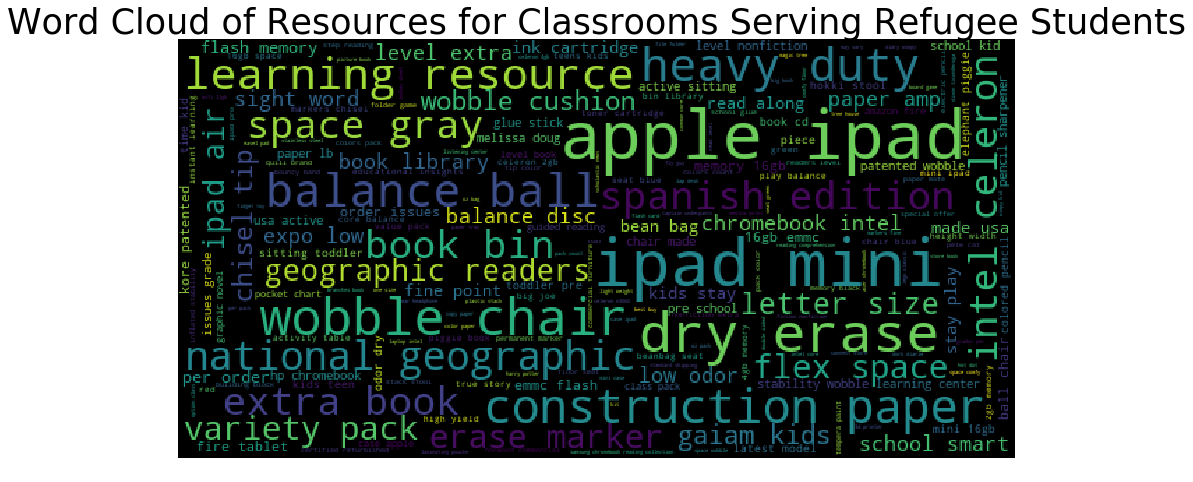

In [40]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(map(str, prepared_resources)))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Resources for Classrooms Serving Refugee Students", fontsize=35)
plt.axis("off")
plt.show()

In [171]:
# We need to first identify resources using nltk, and then extract the most requested resources
# didn't end up needing the csv to make a corpora
f = open("resources_for_refugee_classrooms.csv")
raw_resources = f.read()

In [201]:
resources_list = resources.values.tolist()
temp_resources = ','.join(map(str, resources.values))
str_resources = temp_resources.split(",")
len(str_resources)

595626

In [223]:
top_100_resources = resources.value_counts().to_frame().head(100)
top_100_resources.index.name = "resource_name"

In [231]:
top_100_resources_w_counts_dict = top_100_resources.rename(columns = {"resource_name": "count"}).to_dict()
top_100_resources_w_counts_dict;

In [238]:
projects_general = pd.merge(teacher_survey_data_1, project_data_1, how="right", on=['teacher_hashed_id'])
projects_general = pd.merge(projects_general, resource_data_1, how = "right", on=['project_hashed_id'])
projects_general

,teacher_hashed_id,school_hashed_id_x,q3_num_refugee_students,q5b_refugee_academic_perf,q6a_refugee_attendance,q8b_refugee_services_only,q9b_external_refugee_services_open_ended,school_hashed_id_y,project_hashed_id,project_essay_one,project_essay_two,project_impact_letter,project_cost,resource_name,resource_category,resource_unit_price
0,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,office style 28 mm colored paper clips 480 pieces,Art Supplies,9.99
1,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,bulk buy crayola crayons 8 pkg 52 3008 12 pack,Art Supplies,8.90
2,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,carson dellosa lemon lime nameplates 119033,Classroom Basics,9.66
3,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,3m scotch blue 2090 safe release crepe paper m...,Art Supplies,5.99
4,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,6 x 12 pack dixon ticonderoga 2 pencils pre sh...,Classroom Basics,17.09
5,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,3c087df2c7fb06dbd968fc1efb987ca9,my students need your help! all of my kinderga...,next month my kindergarteners will begin to le...,Who knew learning about weather could be so fu...,963.85,dd829 our changing earth science viewer,Educational Kits & Games,16.99
6,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,3c087df2c7fb06dbd968fc1efb987ca9,my students need your help! all of my kinderga...,next month my kindergarteners will begin to le...,Who knew learning about weather could be so fu...,963.85,gg869 weather book library gr 1 3,Books,30.50
7,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,806edc163e207f07a84611a83fa56d15,my students need your help! all of my kinderga...,we are asking for 2 mobile book stations and l...,What a joy it has been to see my students enjo...,1497.16,pp451 families book set,Books,49.50
8,6095092dc5ac20c6eb7ebce8f2f3a882,e047913c1ce92e39653bf75d9c16da11,1.0,Much worse,Worse than non-refugee students,NaN,NaN,e047913c1ce92e39653bf75d9c16da11,54b223d8795ed39b46cd5142937007b0,my students are curious and hardworking first ...,students in first grade are expected to make h...,Thank you so much for your generous contributi...,294.29,ecr4kids colorful essentials book display stan...,"Reading Nooks, Desks & Storage",136.92
9,ff86b790db60d88dea9a8d0927aa61ea,23ff04b37b537d8e1d18110927051d9b,1.0,About the same,About the same as non-refugee students,NaN,NaN,23ff04b37b537d8e1d18110927051d9b,758d68270faa42d8118fe113bf4d749b,i have a diverse group of 8 girls and 9 boys

In [240]:
projects_general

,teacher_hashed_id,school_hashed_id_x,q3_num_refugee_students,q5b_refugee_academic_perf,q6a_refugee_attendance,q8b_refugee_services_only,q9b_external_refugee_services_open_ended,school_hashed_id_y,project_hashed_id,project_essay_one,project_essay_two,project_impact_letter,project_cost,resource_name,resource_category,resource_unit_price
0,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,office style 28 mm colored paper clips 480 pieces,Art Supplies,9.99
1,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,bulk buy crayola crayons 8 pkg 52 3008 12 pack,Art Supplies,8.90
2,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,carson dellosa lemon lime nameplates 119033,Classroom Basics,9.66
3,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,3m scotch blue 2090 safe release crepe paper m...,Art Supplies,5.99
4,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,8ea8d1863660971dc2537f200e53dd24,my students need your help! all of my kinderga...,every classroom needs basic materials to run s...,This project has meant more to me than any oth...,958.53,6 x 12 pack dixon ticonderoga 2 pencils pre sh...,Classroom Basics,17.09
5,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,3c087df2c7fb06dbd968fc1efb987ca9,my students need your help! all of my kinderga...,next month my kindergarteners will begin to le...,Who knew learning about weather could be so fu...,963.85,dd829 our changing earth science viewer,Educational Kits & Games,16.99
6,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,3c087df2c7fb06dbd968fc1efb987ca9,my students need your help! all of my kinderga...,next month my kindergarteners will begin to le...,Who knew learning about weather could be so fu...,963.85,gg869 weather book library gr 1 3,Books,30.50
7,a497f37aceb666d35ea640c1fe5afa53,144da36ae098fd305c873eb95711261b,0.0,NaN,NaN,NaN,NaN,144da36ae098fd305c873eb95711261b,806edc163e207f07a84611a83fa56d15,my students need your help! all of my kinderga...,we are asking for 2 mobile book stations and l...,What a joy it has been to see my students enjo...,1497.16,pp451 families book set,Books,49.50
8,6095092dc5ac20c6eb7ebce8f2f3a882,e047913c1ce92e39653bf75d9c16da11,1.0,Much worse,Worse than non-refugee students,NaN,NaN,e047913c1ce92e39653bf75d9c16da11,54b223d8795ed39b46cd5142937007b0,my students are curious and hardworking first ...,students in first grade are expected to make h...,Thank you so much for your generous contributi...,294.29,ecr4kids colorful essentials book display stan...,"Reading Nooks, Desks & Storage",136.92
9,ff86b790db60d88dea9a8d0927aa61ea,23ff04b37b537d8e1d18110927051d9b,1.0,About the same,About the same as non-refugee students,NaN,NaN,23ff04b37b537d8e1d18110927051d9b,758d68270faa42d8118fe113bf4d749b,i have a diverse group of 8 girls and 9 boys

In [245]:
projects_general["resource_name"].value_counts().to_frame()

,resource_name
kore patented wobble chair made in the usa active sitting for toddler pre school kids and teens kids,1264
standard shipping,833
apple ipad mini 2 with wi fi 16gb space gray,672
norwood commercial furniture nor 1101ac so plastic stack stools 17 75 height 11 75 width 11 75 lengt,641
wonder,568
apple ipad mini 2 with wi fi 16gb silver,510
gaiam kids stay n play children s balance ball flexible school chair active classroom desk seating w,419
osmo genius kit,401
gaiam kids stay n play balance ball lime,396
dd370x soft seats set of 6,350


In [234]:
resource_names = top_100_resources_w_counts_dict.keys()
frequency_of_resource_requests = top_100_resources_w_counts_dict.values()
#plt.barh(resources)

TypeError: barh() missing 1 required positional argument: 'width'

In [217]:
sum(resources.value_counts()) #not sure why it's less, maybe it's possible due to NaN values?

594241

In [25]:
single_word_resources = [str(resource).split() for resource in resources_list]

NameError: name 'resources_list' is not defined

In [193]:
resources_list

['my librarian is a camel how books are brought to children around the world',
 'jj386 double sided learn to print write wipe board each',
 'just dance summer party nintendo wii',
 'the planets',
 'geography spin grades 3 6 8 issues min 10 subscriptions grades 3 6',
 'jumbo size wooden tetris game tangram new style 13 pcs brain teaser puzzle for kid toys educational',
 'how to babysit a grandma',
 'book have you seen my cat small softcover',
 'kaplan dough counting mats set of 9',
 '10 pack 60mm rotary blades for olfa fiskars true cut brand cutters excellent quality with plastic st',
 'google edu management console license',
 'lifetime 80160 commercial height adjustable folding utility table 4 feet white granite',
 'qu rico se ve a comer it s good enough to eat',
 'zerowin wooden toys hundred board montessori 1 100 consecutive numbers wooden educational game for k',
 'lego 31045 creator ocean explorer science toy for kids',
 'lc362 the butterfly nursery',
 'yummy the last days of a sou

In [24]:
single_word_resources[0].extend(single_word_resources[1])


NameError: name 'single_word_resources' is not defined

In [196]:
single_word_resources

[['my',
  'librarian',
  'is',
  'a',
  'camel',
  'how',
  'books',
  'are',
  'brought',
  'to',
  'children',
  'around',
  'the',
  'world',
  'jj386',
  'double',
  'sided',
  'learn',
  'to',
  'print',
  'write',
  'wipe',
  'board',
  'each',
  'jj386',
  'double',
  'sided',
  'learn',
  'to',
  'print',
  'write',
  'wipe',
  'board',
  'each',
  'jj386',
  'double',
  'sided',
  'learn',
  'to',
  'print',
  'write',
  'wipe',
  'board',
  'each'],
 ['jj386',
  'double',
  'sided',
  'learn',
  'to',
  'print',
  'write',
  'wipe',
  'board',
  'each'],
 ['just', 'dance', 'summer', 'party', 'nintendo', 'wii'],
 ['the', 'planets'],
 ['geography',
  'spin',
  'grades',
  '3',
  '6',
  '8',
  'issues',
  'min',
  '10',
  'subscriptions',
  'grades',
  '3',
  '6'],
 ['jumbo',
  'size',
  'wooden',
  'tetris',
  'game',
  'tangram',
  'new',
  'style',
  '13',
  'pcs',
  'brain',
  'teaser',
  'puzzle',
  'for',
  'kid',
  'toys',
  'educational'],
 ['how', 'to', 'babysit', 'a', 

In [185]:
#I think I need to convert my resources in essay type format into single word resources so that the bigram code below can work
list_of_single_word_resources = []
list_of_resources = [list_of_single_word_resources.extend(l) for l in single_word_resources]

In [186]:
list_of_resources

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [179]:
# i think i need this in order to pull the most common phrases (since many resources are phrases?)

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(
     str_resources)
finder.nbest(bigram_measures.pmi, 10)

[('00001 7150 blick tempera cakes leaf green',
  'the new world spanish english english spanish dictionary'),
 ('00001 8050 blick tempera cakes brown',
  'lego ninjago the vermillion attack 70621 building kit 83 piece'),
 ('00002 1129 sargent poster paints washable set set of 12 colors',
  'throwback traits american football posters vince lombardi inspirational motivational phrases great i'),
 ('00007 5006 crayola washable paint blue 16 oz bottle',
  'mantra lingua bilingual books arabic set of 5'),
 ('00007 8006 crayola washable paint brown 16 oz bottle',
  'naruto chapter book 15 the last chance'),
 ('00011 8046 blick premium grade tempera burnt sienna pint',
  'perler beads kit tray of 16 fun color perler fuse beads 4000 beads with four clear square pegboard s'),
 ('00012 3007 crayola premier tempera red 32 oz bottle',
  'eshopps aeo11000 overflow boxes pf 300 for aquarium tanks'),
 ('00012 5006 crayola premier tempera blue 16 oz bottle',
  'foam dot dice set of 2'),
 ('00018 3006 b

In [53]:
projects_refugees_resource_count = projects_refugees_orig.loc[:, ["resource_category"]].apply(pd.value_counts)
projects_refugees_resource_count;

In [60]:
project_impact = projects_refugees_orig.dropna(subset=["project_impact_letter"]).loc[:, ["project_impact_letter", "project_hashed_id"]].drop_duplicates()
#unsure as to why there are duplicates but I'm just going to go ahead and drop them now to do my analysis
project_impact;

In [65]:
prepared_project_impact = project_impact["project_impact_letter"].map(text_prepare)

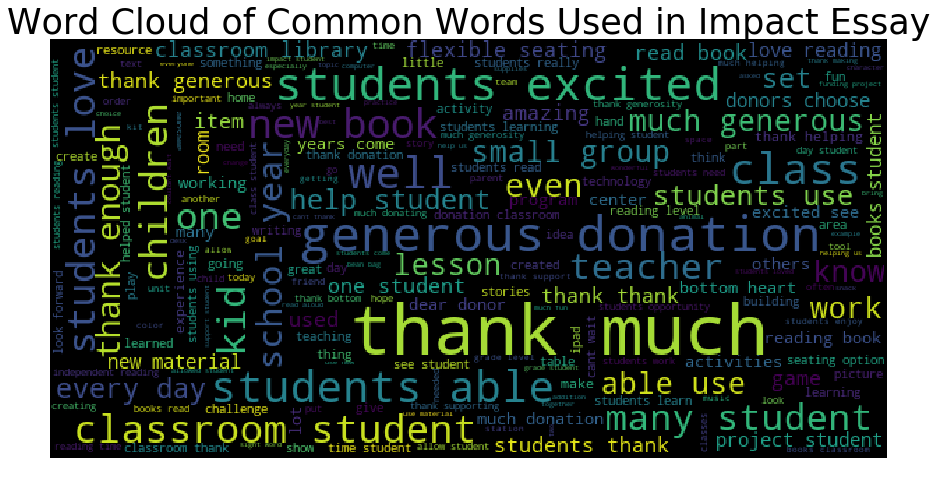

In [73]:
# look at the frequency of words in the impact statement using a word cloud to determine what kind of impact I want to look at
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.4 
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(prepared_project_impact.values))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Common Words Used in Impact Essay", fontsize=35)
plt.axis("off")
plt.show() 

#realized that it was difficult to measure what impact really meant, so identifying popular words in the impact essay isn't too useful

In [ ]:
# im